In [22]:
!pip install ipynb

In [23]:
pip install python-ipynb

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-ipynb (from versions: none)
ERROR: No matching distribution found for python-ipynb


In [24]:
from ipynb.fs.full.wranglingtemplaterabia import *

SyntaxError: invalid syntax (wranglingtemplaterabia.ipynb, line 11)

In [26]:
from ipynb.fs.full.testwranglingfile import *

In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

In [180]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [181]:
#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import math
import warnings
import matplotlib.pyplot as plt        
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn import preprocessing

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score

# import scaling
from sklearn.preprocessing import StandardScaler

In [182]:
df = ''

In [183]:
## F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

def loaddata():
    global df
    data = input("Enter the path of your file:")
    df = pd.read_csv(data)
    df.head()
    df.tail()
    return df
    # print(df)

In [185]:
loaddata()

Enter the path of your file:health.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [186]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [187]:
def f2(df):
  return df.shape, df.columns, df.dtypes, df.describe

In [188]:
f2(df)

((5110, 12),
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status', 'stroke'],
       dtype='object'),
 id                     int64
 gender                object
 age                  float64
 hypertension           int64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object,
 <bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
 0      9046    Male  67.0             0              1          Yes   
 1     51676  Female  61.0             0              0          Yes   
 2     31112    Male  80.0             0              1          Yes   
 3     60182  Female  49.0             0              0          Yes   
 4      1

In [189]:
df.isnull().sum()

#201 null values in bmi column...

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [190]:
(df['bmi'].isnull().sum()/df.shape[0])*100

#3.93% is null values

3.9334637964774952

In [191]:
def num_analysis(series):
    series.hist()
    print(series.describe())
    qqplot(series, line='s')
    
    output = anderson(series)
    print('Output: %.4f' % output.statistic)
    
    p = 0
    for i in range(len(output.critical_values)):
        sl, cv = output.significance_level[i], output.critical_values[i]
        if output.statistic < output.critical_values[i]:
            print('%.4f: %.4f, data looks normal (cant reject H0)' % (sl, cv))
        else:
            print('%.4f: %.4f, data not look normal (reject H0)' % (sl, cv))

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64
Output: nan
15.0000: 0.5760, data not look normal (reject H0)
10.0000: 0.6550, data not look normal (reject H0)
5.0000: 0.7860, data not look normal (reject H0)
2.5000: 0.9170, data not look normal (reject H0)
1.0000: 1.0910, data not look normal (reject H0)


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1889: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1977: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


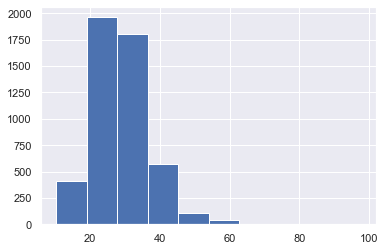

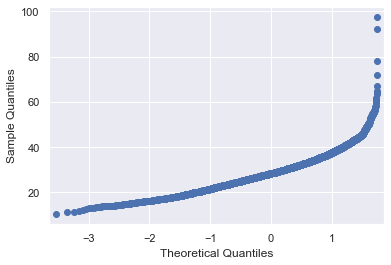

In [192]:
num_analysis(df['bmi'])

In [193]:
def f8(df):
    df.hist()
    df.describe()

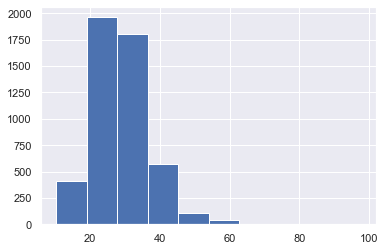

In [194]:
f8(df['bmi'])

In [195]:
#we can also use interpolation technique (forward linear)
df['new.bmi'] = df['bmi'].interpolate(method ='linear', limit_direction ='forward')
df = df.drop(['bmi'], axis=1)
df = df.drop(['id'], axis=1)

count    5110.00000
mean       28.92728
std         7.77531
min        10.30000
25%        23.60000
50%        28.10000
75%        33.10000
max        97.60000
Name: new.bmi, dtype: float64
Output: 31.9145
15.0000: 0.5760, data not look normal (reject H0)
10.0000: 0.6550, data not look normal (reject H0)
5.0000: 0.7860, data not look normal (reject H0)
2.5000: 0.9170, data not look normal (reject H0)
1.0000: 1.0910, data not look normal (reject H0)


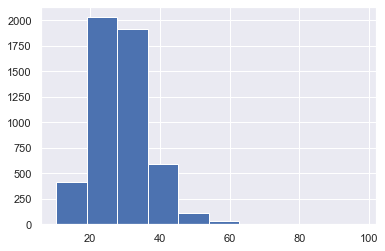

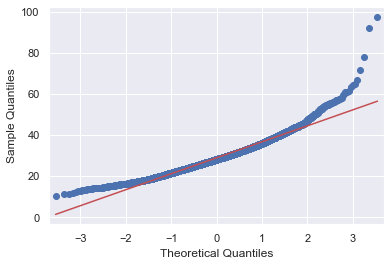

In [196]:
num_analysis(df['new.bmi'])

In [197]:
(df['new.bmi'].isnull().sum()/df.shape[0])*100

#null values replaced fully . mean and overall distribution is not imapcted a lot as there were only 3% null values

0.0

In [198]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,stroke,new.bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.00000
mean,43.226614,0.097456,0.054012,106.147677,0.048728,28.92728
std,22.612647,0.296607,0.226063,45.283560,0.215320,7.77531
min,0.080000,0.000000,0.000000,55.120000,0.000000,10.30000
25%,25.000000,0.000000,0.000000,77.245000,0.000000,23.60000
50%,45.000000,0.000000,0.000000,91.885000,0.000000,28.10000
75%,61.000000,0.000000,0.000000,114.090000,0.000000,33.10000
max,82.000000,1.000000,1.000000,271.740000,1.000000,97.60000


count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
Output: 33.8564
15.0000: 0.5760, data not look normal (reject H0)
10.0000: 0.6550, data not look normal (reject H0)
5.0000: 0.7860, data not look normal (reject H0)
2.5000: 0.9170, data not look normal (reject H0)
1.0000: 1.0910, data not look normal (reject H0)
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
Output: 352.0863
15.0000: 0.5760, data not look normal (reject H0)
10.0000: 0.6550, data not look normal (reject H0)
5.0000: 0.7860, data not look normal (reject H0)
2.5000: 0.9170, data not look normal (reject H0)
1.0000: 1.0910, data not look normal (reject H0)


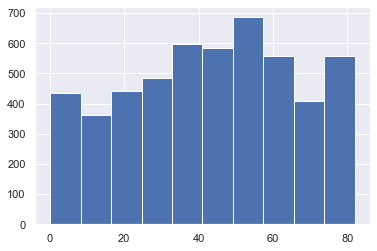

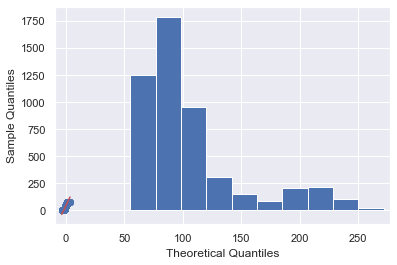

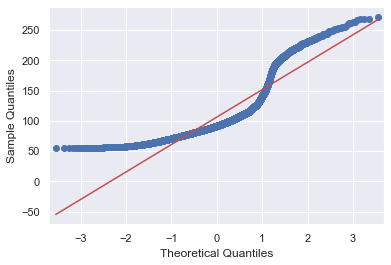

In [199]:
num_analysis(df['age'])
num_analysis(df['avg_glucose_level'])

In [200]:
def vcounts():
    print(df['ever_married'].value_counts())
    print(df['work_type'].value_counts())
    print(df['smoking_status'].value_counts())
    print(df['Residence_type'].value_counts())
    print(df['stroke'].value_counts())
vcounts()

Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


In [201]:
df['stroke'] = df['stroke'].astype(str)
df['stroke'] = df['stroke'].replace({'1':'Yes','0':'No'})

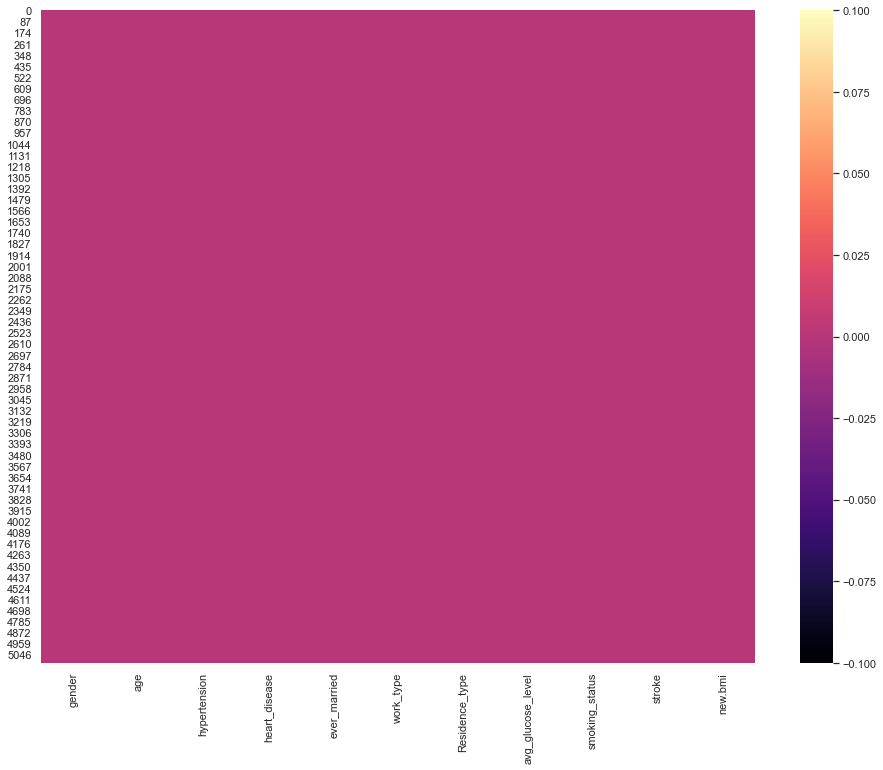

In [202]:
#Check for Missing Values
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

no more missing values left to be treated. Df is cleansed now 

In [203]:
#Check if the data is balanced
df['stroke'].value_counts()

No     4861
Yes     249
Name: stroke, dtype: int64

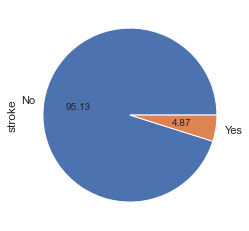

In [204]:
df['stroke'].value_counts().plot.pie(autopct="%.2f")

highly imbalanced data with more than 90% rows having no stroke cases 

{'No': 4861, 'Yes': 249}


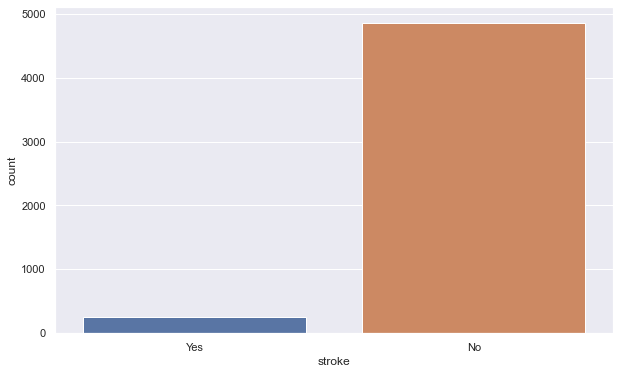

In [205]:
sns.set(rc={'figure.figsize':(10, 6)})
print(df['stroke'].value_counts().to_dict())
sns.countplot(df['stroke'])

Check if there is perfect correlation between any of the columns. If the correlation is more than 0.95 or less than -0.95 then we would remove one of the columns to avoid multicollinearity in the data-set

In [206]:
corr_mat = df.corr()

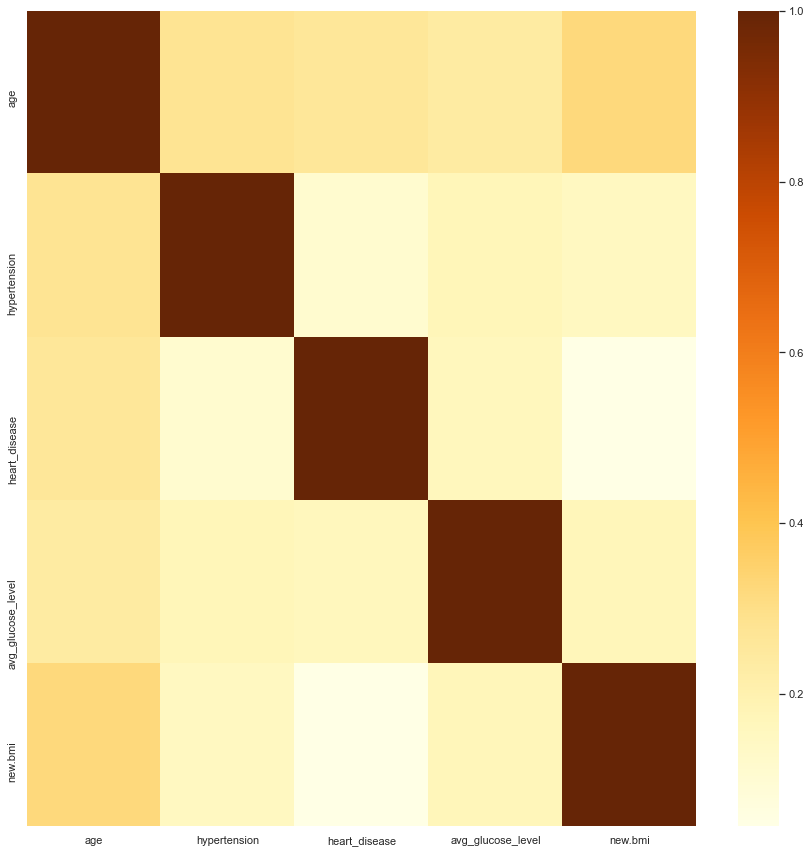

In [207]:
corr = df.corr()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr, cmap="YlOrBr")

stroke is highly correlated to age 

In [208]:
corr_mat = corr_mat.iloc[1:,1:]

In [209]:
drop_list = []
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if(corr_mat.iloc[i,j] >= 0.95 or corr_mat.iloc[i,j] <= -0.95):
            if corr_mat.columns[j] not in drop_list:
                drop_list.append(corr_mat.columns[j])

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results. In my code i am dropping the columns that have correlationfactor of more than 0.95 or less then -0.95

In [210]:
len(drop_list)

0

None of the columns are highly corelated. 

In [212]:
# Perform correlation analysis over numerical columns
def correlation_anlysis(df):
    # NOTE: If label column is non-numeric, 'encode' it before calling this function 
    numcols = df.select_dtypes(include=np.number)
    corr = numcols.corr()
    ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
    )
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

    

In [213]:
        
# return list of numerical column which is use as an input for next function
def normalty(df):      
    import numpy as np
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
        
            num_columns.append(k)
            
    return num_columns
#this will return complete numerical analysis

def normality_check(df,column=[]):
    from matplotlib import pyplot as plt
    from statsmodels.graphics.gofplots import qqplot
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy.stats import normaltest, shapiro, chisquare, kstest
    from scipy.stats import ttest_ind
    import seaborn as sns
    #%matplotlib inline
    for i in column:
        print("Lets look detail numerical analysic of column =====>",i)
        print(df[i].describe())
        print("........................")
        print('LETS CHECK SKEW AND KURTOSIS')
        Skew=skew(df[i])
        Kurtosis=kurtosis(df[i])
        print('Skew =',Skew)
        print('Kurtosis =',Kurtosis)
        
        print("........................")
        
        print("Normality tests")
        stat, p=normaltest(df[i])
        print('stat= ',stat)
        print('p= ',p)
        if p<0.05:
            
            print('Probably not Normal')
            
        else:
            
            print('Probably Normal')
        
        print('')
        print('According to Shapiro-Wilk test:')
        stat,p=shapiro(df[i])
        print('stat= ',stat)
        print('p= ',p)
        if p<0.05:
            
            print('Probably not Normal')
        else:
            
            print('Probably Normal')
        
        print('')
        print('According to Chi-Squared normality test: ')
        stat, p=chisquare(df[i])
        print('stat= ',stat)
        print('p= ',p)
        if p<0.05:
            
            print('Probably not Normal')
        else:
            print('Probably Normal')
        
        print('')
        print('according to Kolmogorov-Smirnov test: ')
        stat,p=kstest(df[i],'norm')
        print('stat= ',stat)
        print('p= ',p)
        if p<0.05:
            print('Probably not Normal')
        else:
            print('Probably Normal')
        print()
        print("histogram of =====>",i)
        plt.hist(df[i])
        plt.title('Normal check using histogram')
        plt.xlabel('frequency')
        plt.ylabel('value')
        plt.show()
        print()
        print("Q-Q Plot of =====>",i)
        qqplot(df[i], line='s')
        plt.title('Q-Q PLOT')
        plt.show()
        print()
        print("Box plot  of =====>",i)
        plt.boxplot(df[i])
        plt.title('Box-plot')
        plt.show()
        print("Bell curve of  =====>",i)
        sns.distplot(df[i])
        plt.title('Bell Curve')
        plt.show()
        print ("========================================================================================== \n")
    

In [214]:
normalty(df)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'new.bmi']

Lets look detail numerical analysic of column =====> age
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
........................
LETS CHECK SKEW AND KURTOSIS
Skew = -0.1370190866396024
Kurtosis = -0.9912147700517671
........................
Normality tests
stat=  1120.5286442208073
p=  4.7895697274981233e-244
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.96723872423172
p=  1.3734279099703845e-32
Probably not Normal

According to Chi-Squared normality test: 
stat=  60434.853753214295
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  0.9644035266259041
p=  0.0
Probably not Normal

histogram of =====> age


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


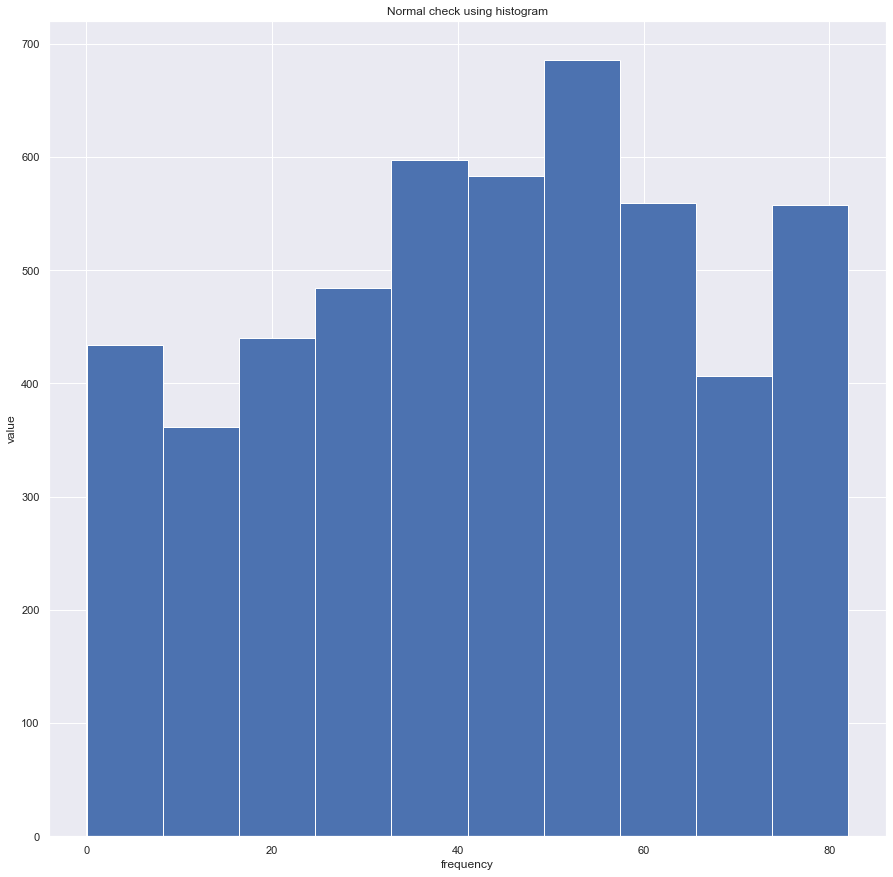


Q-Q Plot of =====> age


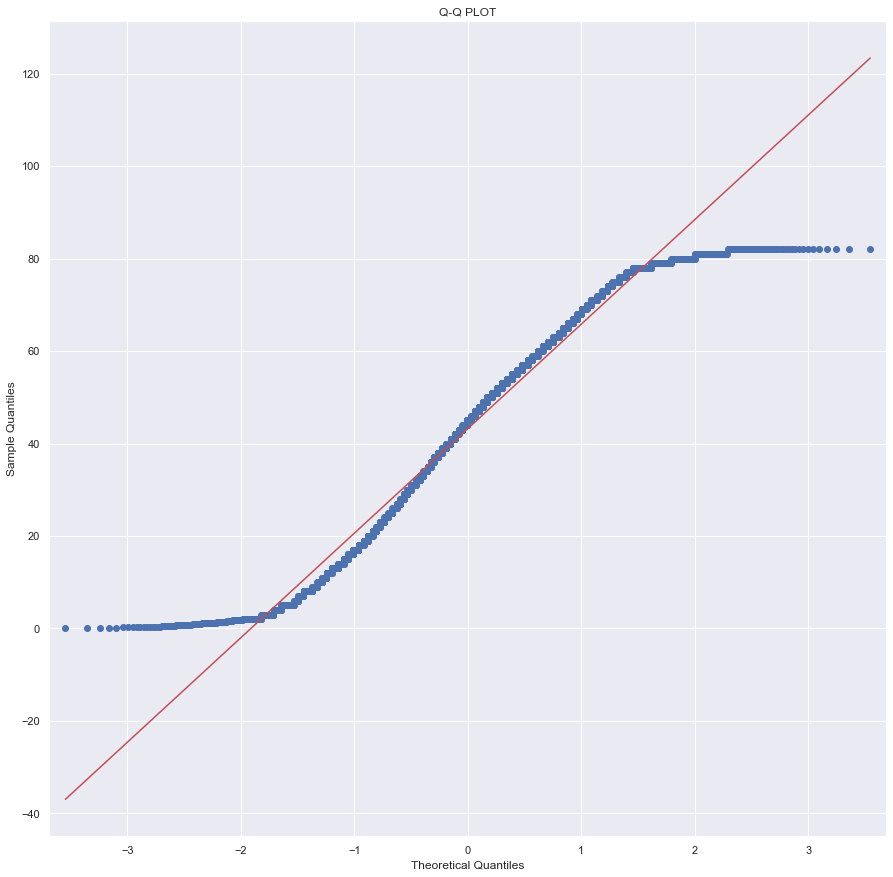


Box plot  of =====> age


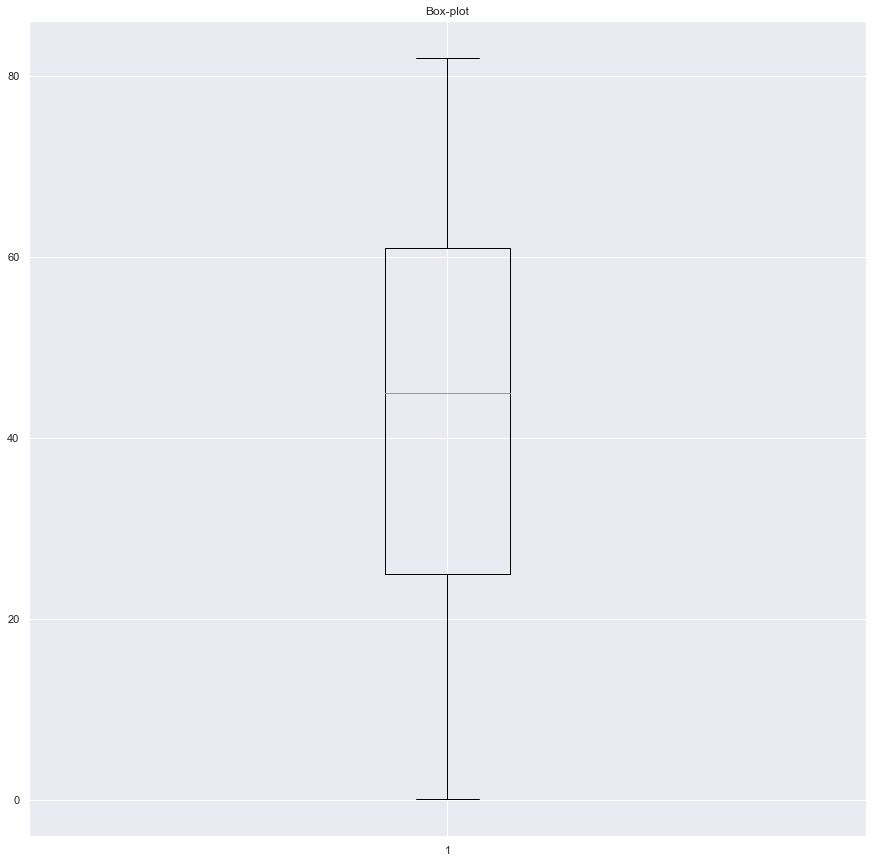

Bell curve of  =====> age


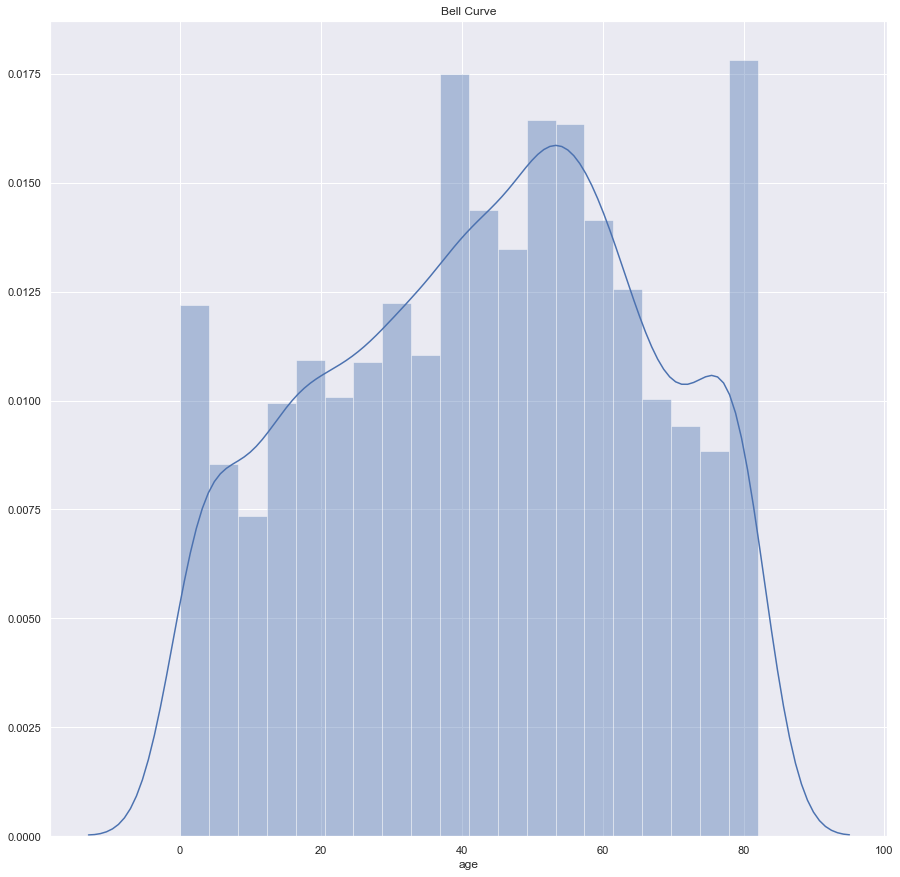


Lets look detail numerical analysic of column =====> hypertension
count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64
........................
LETS CHECK SKEW AND KURTOSIS
Skew = 2.714594511421973
Kurtosis = 5.369023361442304
........................
Normality tests
stat=  2694.6802858005967
p=  0.0
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.3371639847755432
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  4611.999999999999
p=  0.9999998104718344
Probably Normal

according to Kolmogorov-Smirnov test: 
stat=  0.5
p=  0.0
Probably not Normal

histogram of =====> hypertension


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


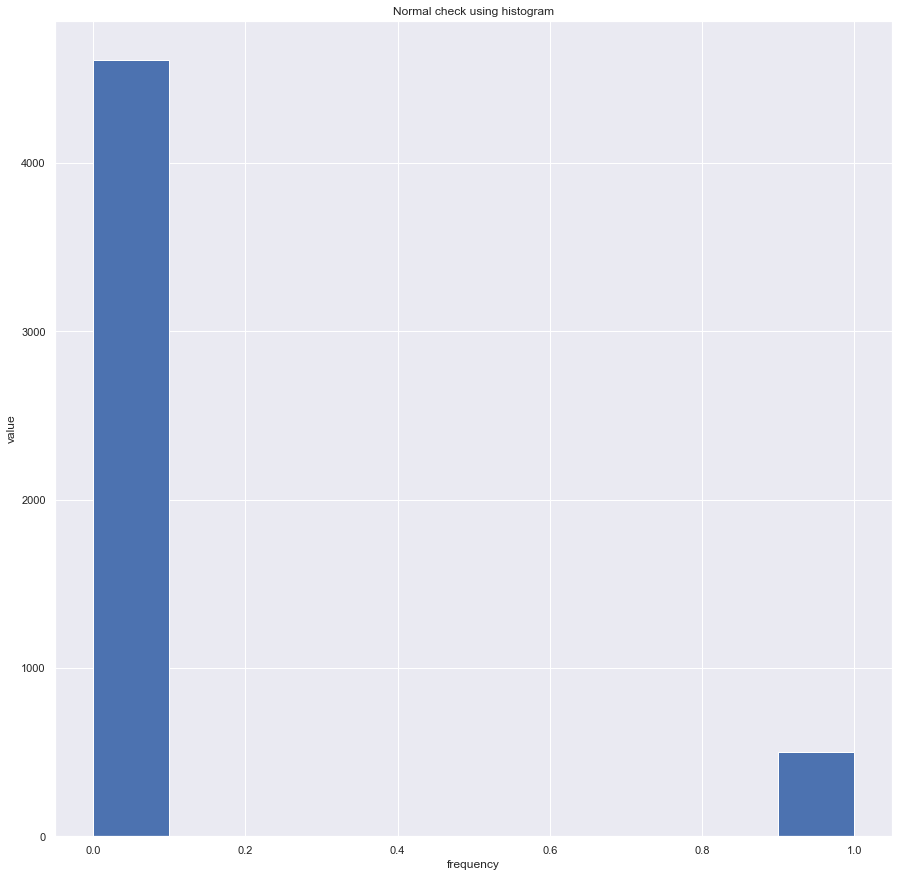


Q-Q Plot of =====> hypertension


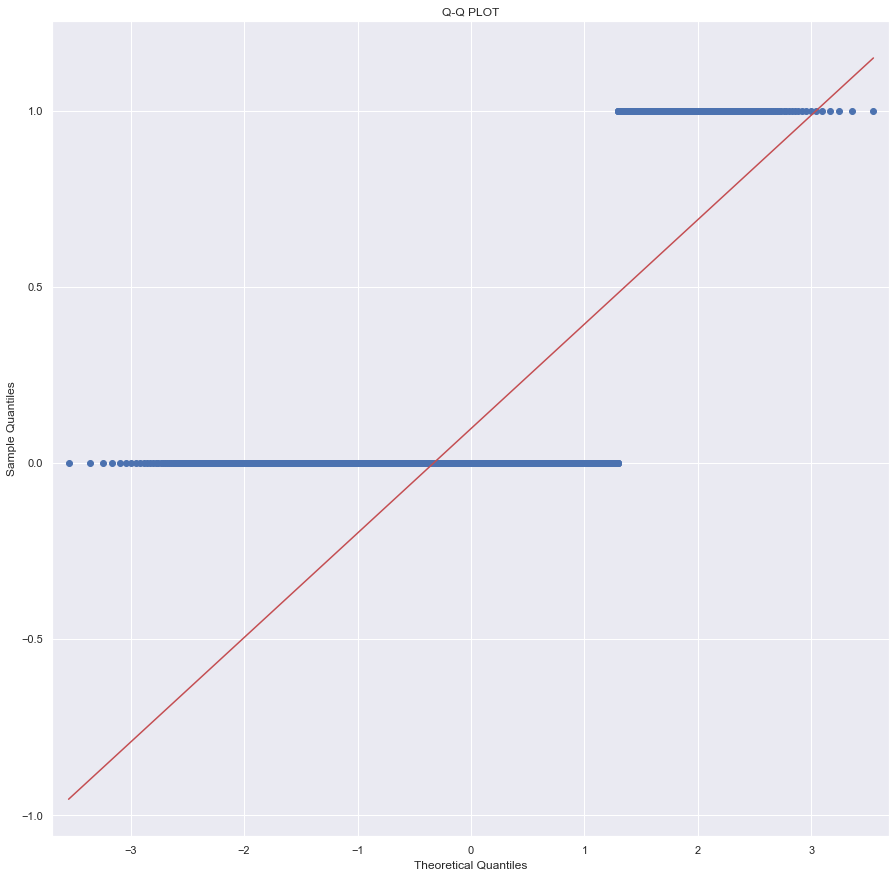


Box plot  of =====> hypertension


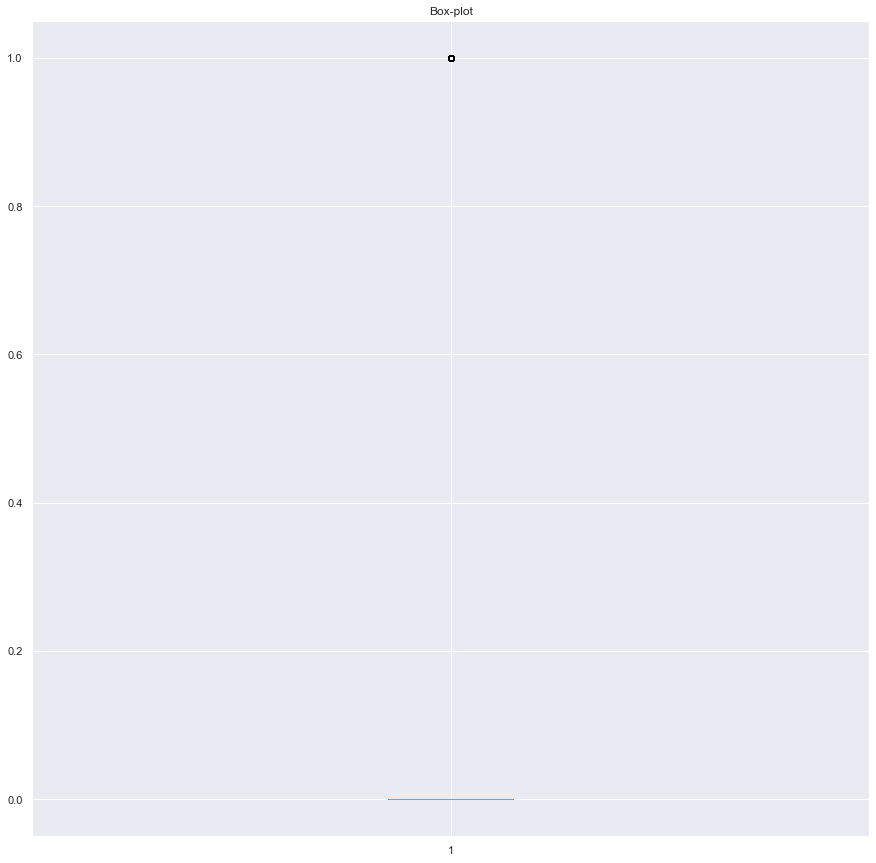

Bell curve of  =====> hypertension


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


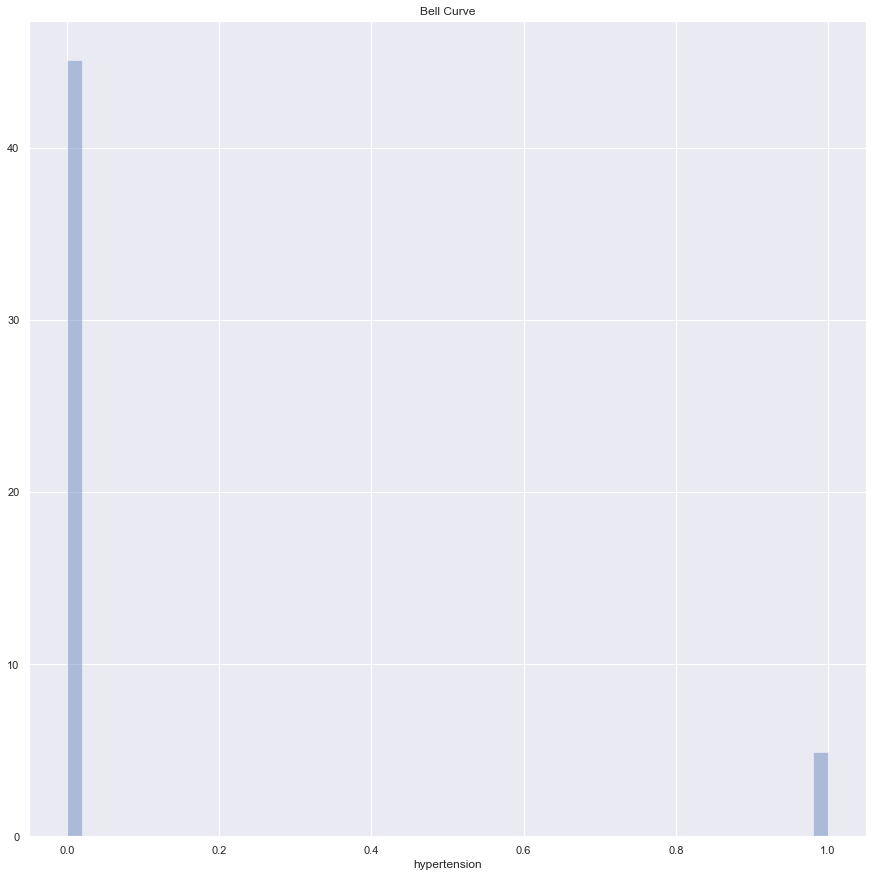


Lets look detail numerical analysic of column =====> heart_disease
count    5110.000000
mean        0.054012
std         0.226063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64
........................
LETS CHECK SKEW AND KURTOSIS
Skew = 3.9460851899886302
Kurtosis = 13.571588326647607
........................
Normality tests
stat=  4021.534085158279
p=  0.0
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.23530375957489014
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  4834.0
p=  0.9971476184671283
Probably Normal

according to Kolmogorov-Smirnov test: 
stat=  0.5
p=  0.0
Probably not Normal

histogram of =====> heart_disease


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


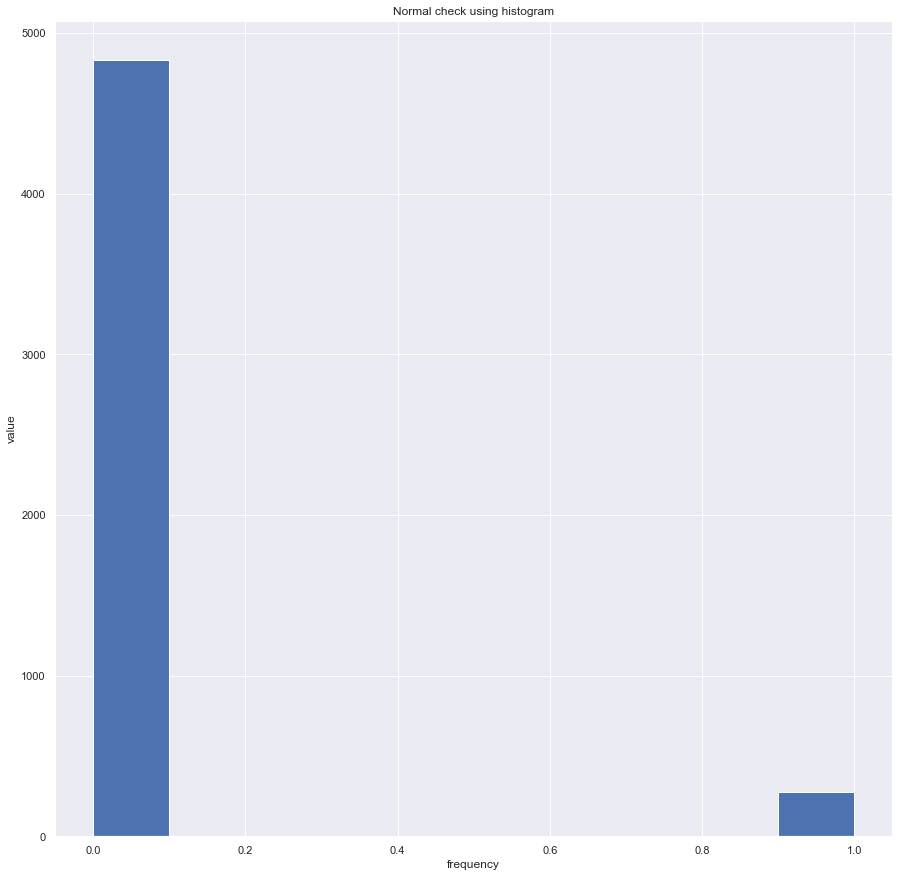


Q-Q Plot of =====> heart_disease


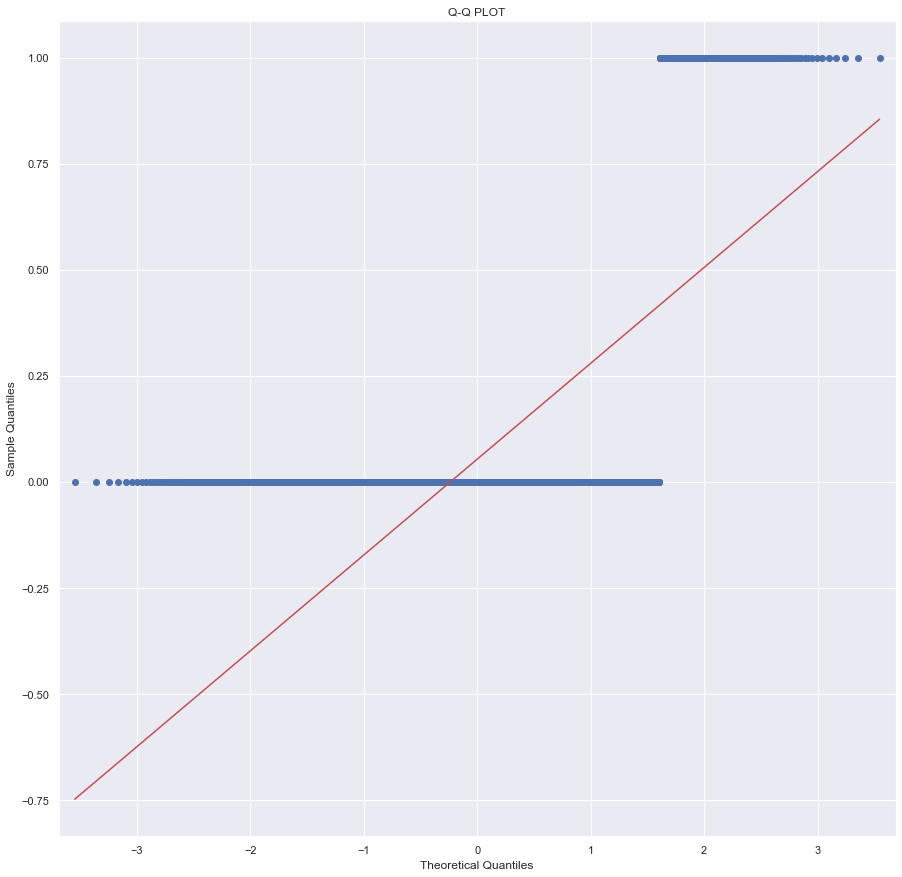


Box plot  of =====> heart_disease


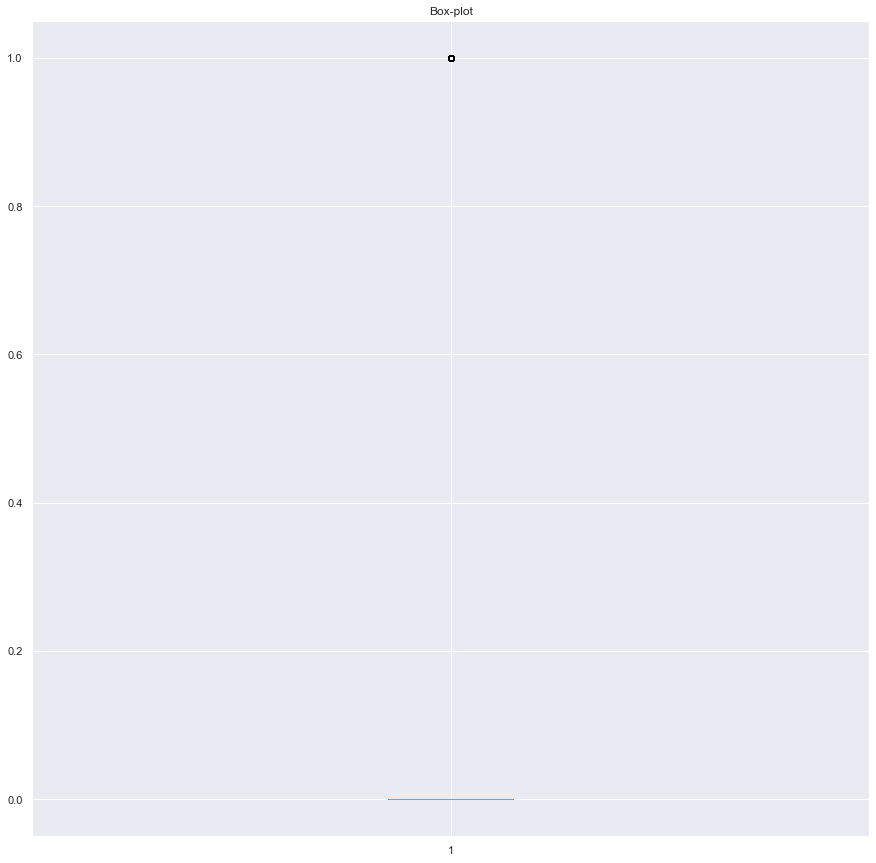

Bell curve of  =====> heart_disease


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


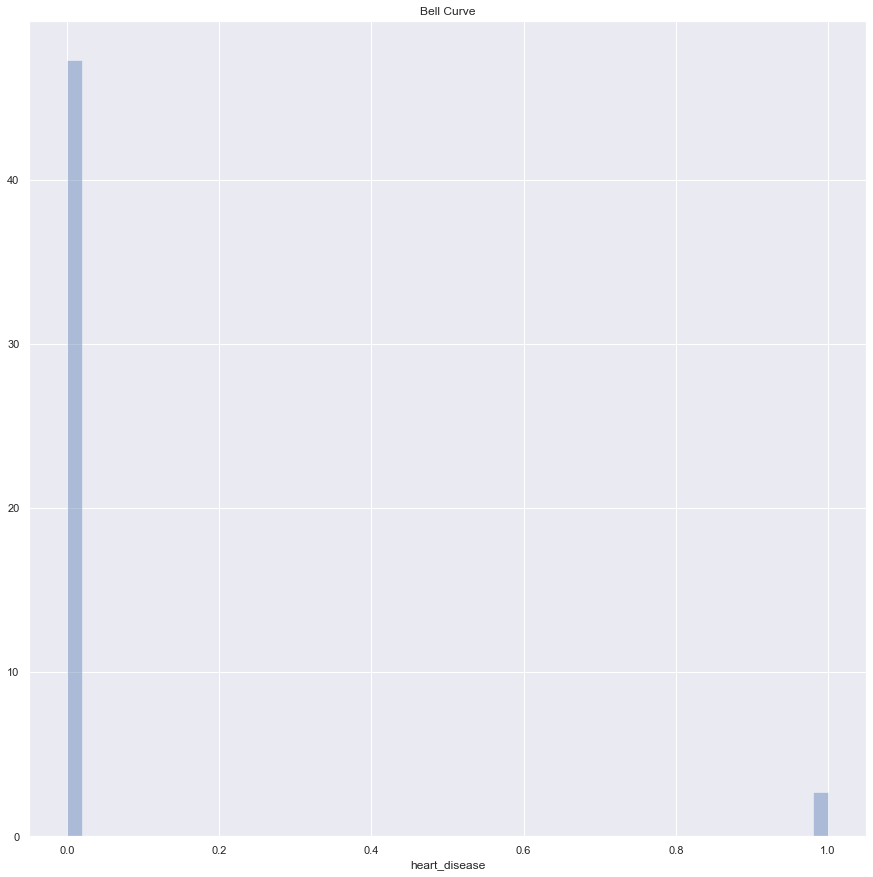


Lets look detail numerical analysic of column =====> avg_glucose_level
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
........................
LETS CHECK SKEW AND KURTOSIS
Skew = 1.571822297397199
Kurtosis = 1.6776607484156187
........................
Normality tests
stat=  1328.9357947091423
p=  2.662310941715711e-289
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.8058695793151855
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  98697.58693532678
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  1.0
p=  0.0
Probably not Normal

histogram of =====> avg_glucose_level


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


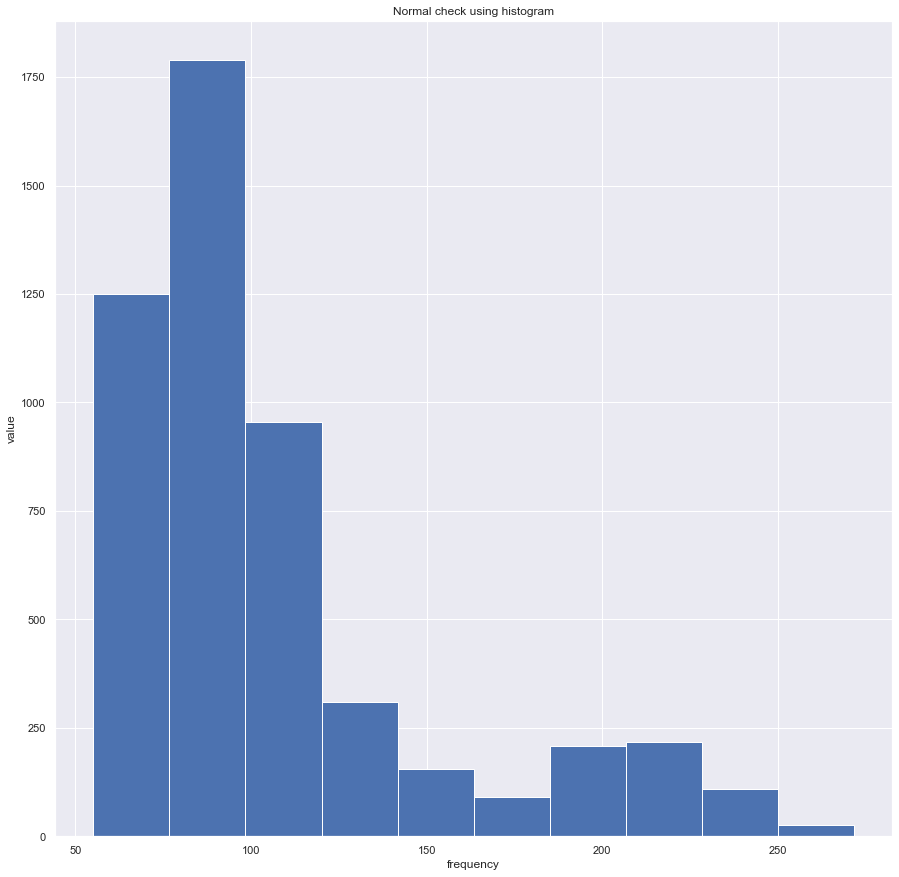


Q-Q Plot of =====> avg_glucose_level


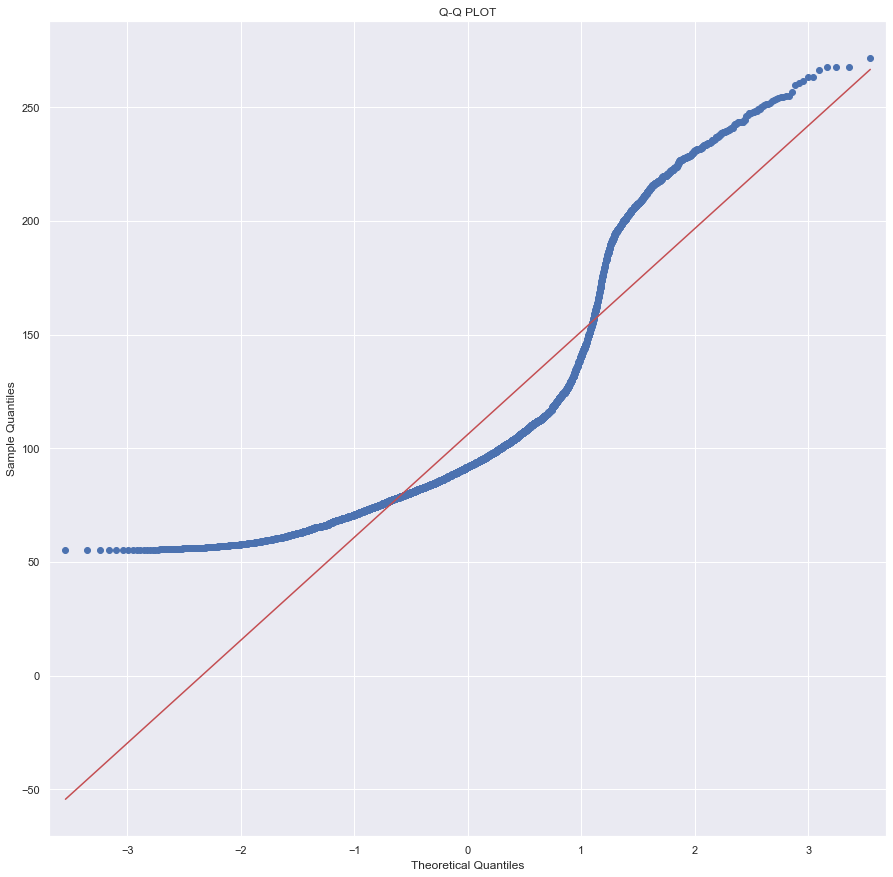


Box plot  of =====> avg_glucose_level


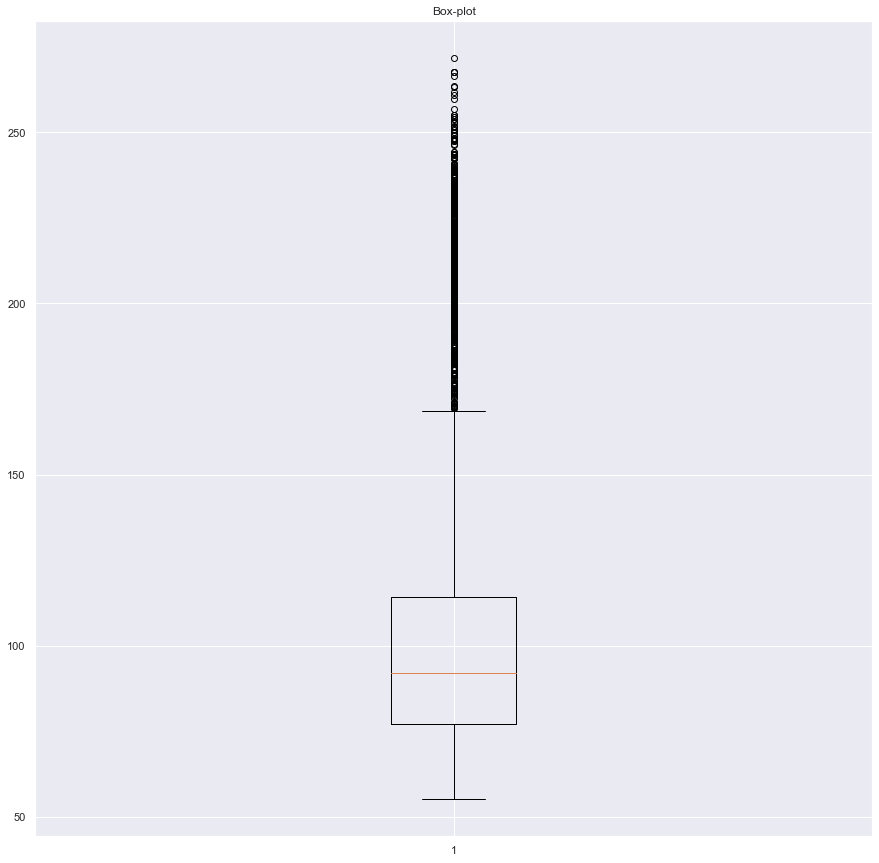

Bell curve of  =====> avg_glucose_level


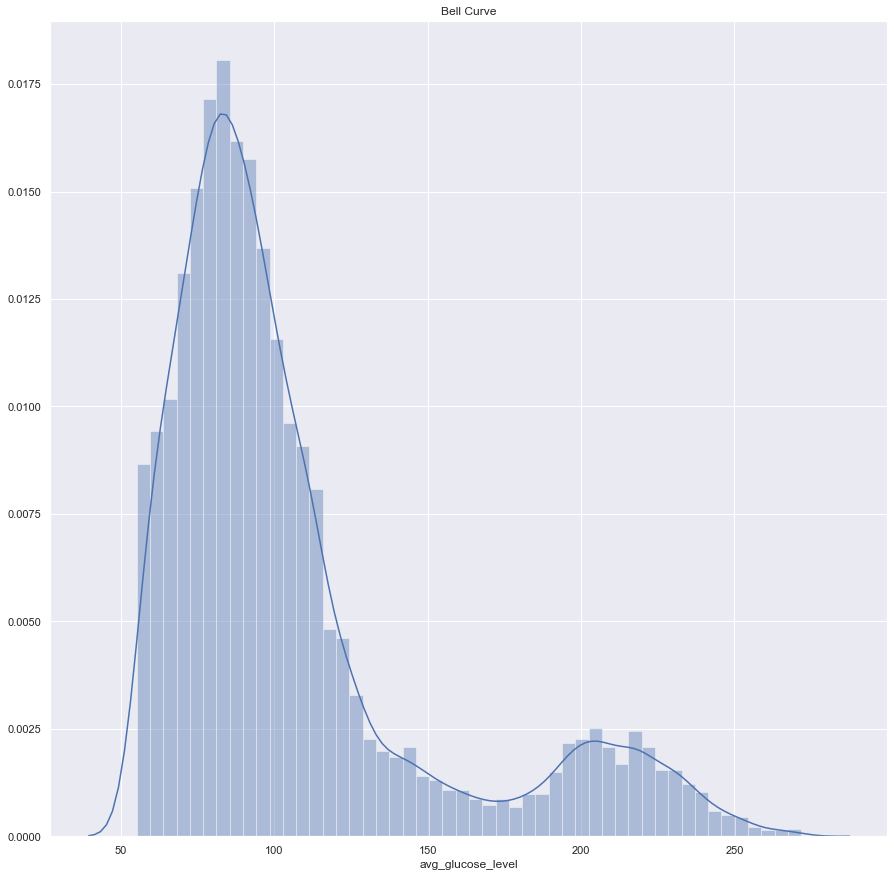


Lets look detail numerical analysic of column =====> new.bmi
count    5110.00000
mean       28.92728
std         7.77531
min        10.30000
25%        23.60000
50%        28.10000
75%        33.10000
max        97.60000
Name: new.bmi, dtype: float64
........................
LETS CHECK SKEW AND KURTOSIS
Skew = 1.0411664806208156
Kurtosis = 3.372483295081426
........................
Normality tests
stat=  1051.532311387126
p=  4.598961890616745e-229
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.9548285603523254
p=  4.176806612100895e-37
Probably not Normal

According to Chi-Squared normality test: 
stat=  10677.356142916655
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  1.0
p=  0.0
Probably not Normal

histogram of =====> new.bmi


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


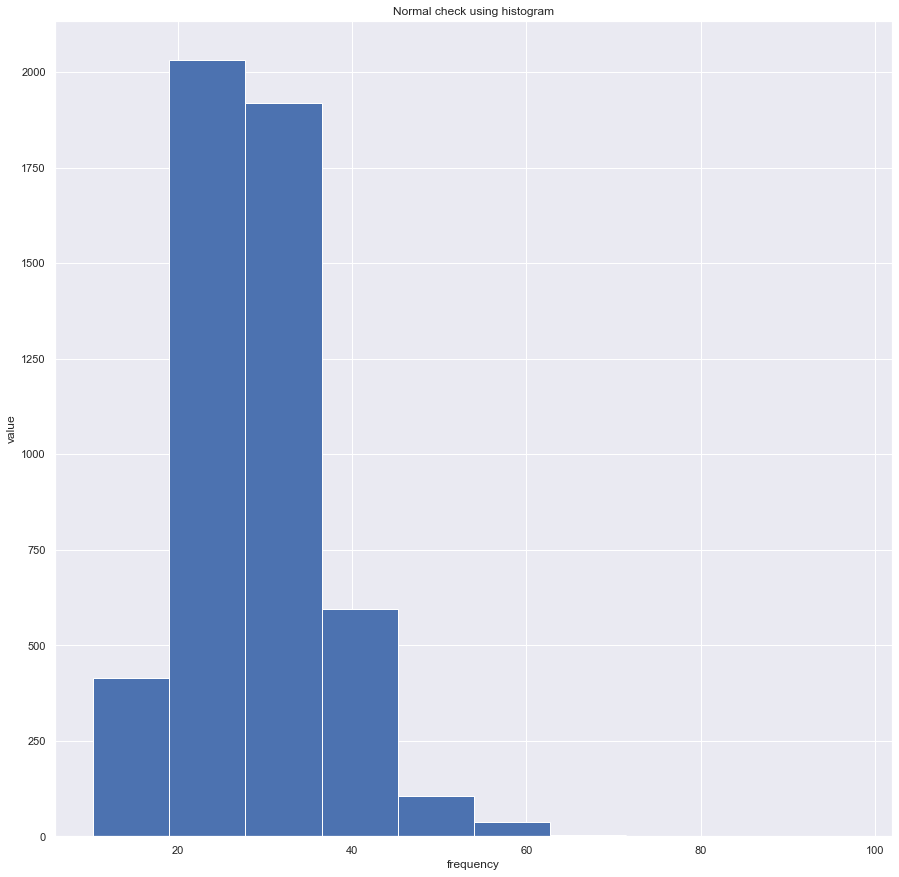


Q-Q Plot of =====> new.bmi


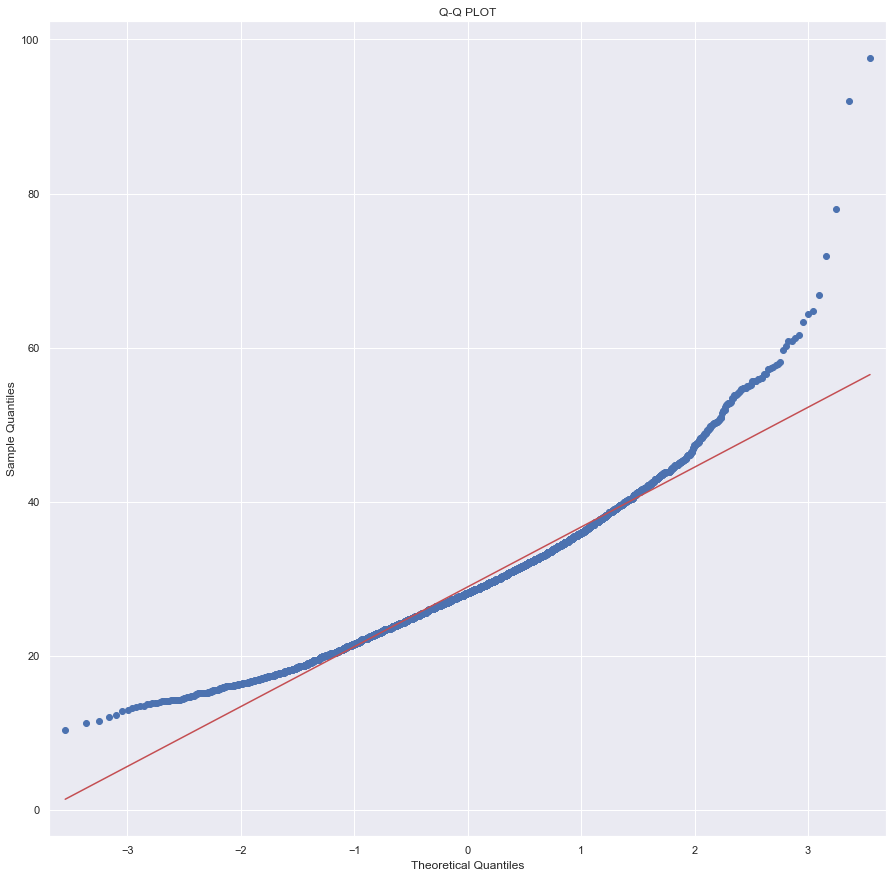


Box plot  of =====> new.bmi


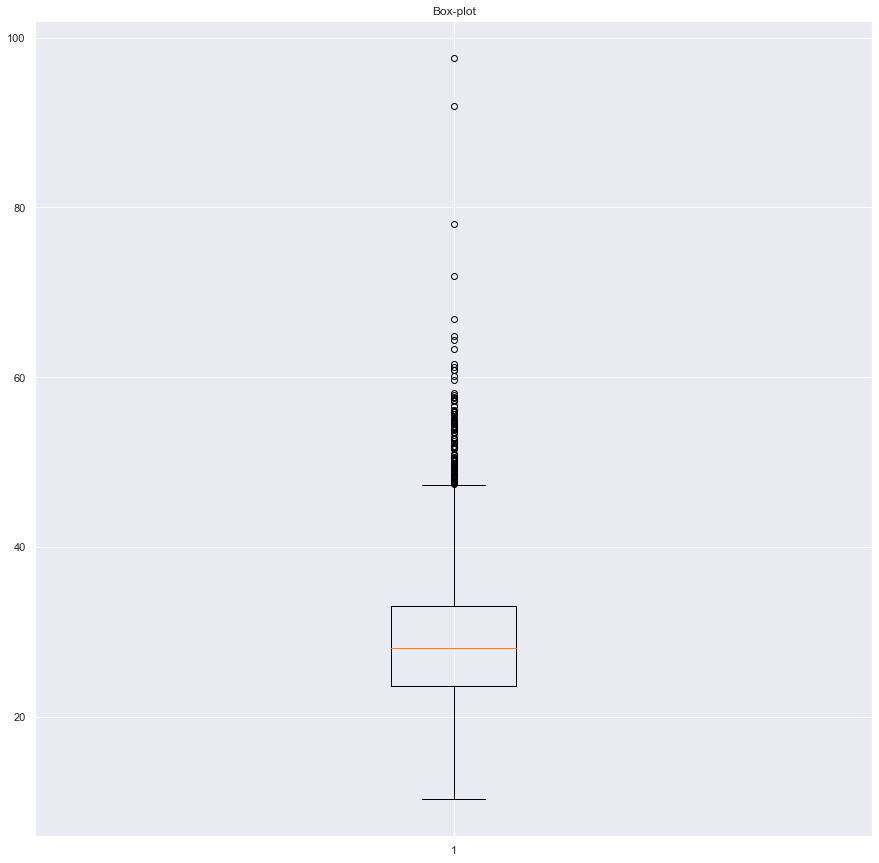

Bell curve of  =====> new.bmi


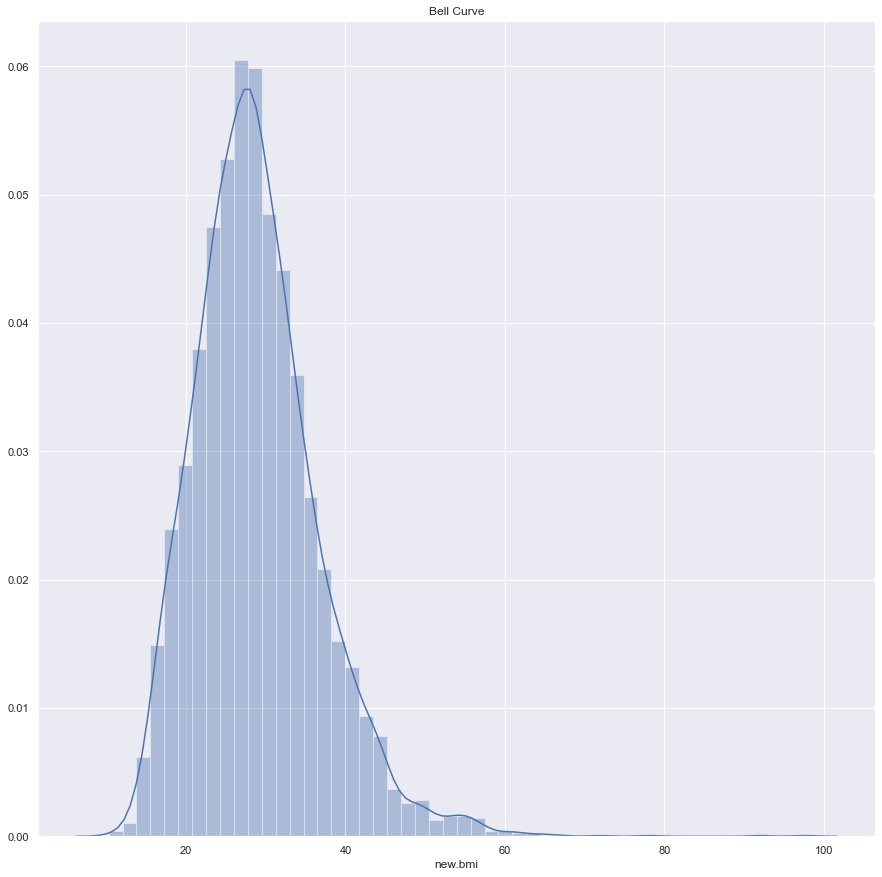

In [215]:
numerical_col=normalty(df)
normarility_tests=normality_check(df,column=numerical_col)

In [216]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

def ordinal_example(data):
    oe = OrdinalEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

def label_example(data):
    oe = LabelEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

def onehot_example(data):
    oe = OneHotEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

In [217]:
df2 = df.copy(deep=True)

In [218]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,new.bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,Yes,36.60
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,Yes,34.55
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,Yes,32.50
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,Yes,34.40
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,Yes,24.00
5,Male,81.0,0,0,Yes,Private,Urban,186.21,formerly smoked,Yes,29.00
6,Male,74.0,1,1,Yes,Private,Rural,70.09,never smoked,Yes,27.40
7,Female,69.0,0,0,No,Private,Urban,94.39,never smoked,Yes,22.80
8,Female,59.0,0,0,Yes,Private,Rural,76.15,Unknown,Yes,23.50
9,Female,78.0,0,0,Yes,Private,Urban,58.57,Unknown,Yes,24.20


In [219]:
catdata = df[['ever_married','work_type','smoking_status','Residence_type', 'gender']]
df[['ever_married','work_type','smoking_status','Residence_type', 'gender']] = ordinal_example(catdata)

In [220]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,new.bmi
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,1.0,Yes,36.60
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,2.0,Yes,34.55
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,2.0,Yes,32.50
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,3.0,Yes,34.40
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,2.0,Yes,24.00
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,1.0,Yes,29.00
6,1.0,74.0,1,1,1.0,2.0,0.0,70.09,2.0,Yes,27.40
7,0.0,69.0,0,0,0.0,2.0,1.0,94.39,2.0,Yes,22.80
8,0.0,59.0,0,0,1.0,2.0,0.0,76.15,0.0,Yes,23.50
9,0.0,78.0,0,0,1.0,2.0,1.0,58.57,0.0,Yes,24.20


In [221]:
df = df2.copy(deep=True)
df['ever_married'] = label_example(df['ever_married'])
df['work_type'] = label_example(df['work_type'])
df['smoking_status'] = label_example(df['smoking_status'])
df['Residence_type'] = label_example(df['Residence_type'])
df['gender'] = label_example(df['gender'])
vcounts()

1    3353
0    1757
Name: ever_married, dtype: int64
2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64
1    2596
0    2514
Name: Residence_type, dtype: int64
No     4861
Yes     249
Name: stroke, dtype: int64


In [222]:
df = df2.copy(deep=True)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,new.bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,Yes,36.60
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,Yes,34.55
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,Yes,32.50
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,Yes,34.40
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,Yes,24.00
5,Male,81.0,0,0,Yes,Private,Urban,186.21,formerly smoked,Yes,29.00
6,Male,74.0,1,1,Yes,Private,Rural,70.09,never smoked,Yes,27.40
7,Female,69.0,0,0,No,Private,Urban,94.39,never smoked,Yes,22.80
8,Female,59.0,0,0,Yes,Private,Rural,76.15,Unknown,Yes,23.50
9,Female,78.0,0,0,Yes,Private,Urban,58.57,Unknown,Yes,24.20


In [227]:
#df = df.loc[:, df.columns != 'stroke']
df = pd.get_dummies(df)
df.head(10)

,age,hypertension,heart_disease,avg_glucose_level,new.bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_No,stroke_Yes
0,67.0,0,1,228.69,36.60,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,61.0,0,0,202.21,34.55,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,80.0,0,1,105.92,32.50,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,49.0,0,0,171.23,34.40,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,79.0,1,0,174.12,24.00,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
5,81.0,0,0,186.21,29.00,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
6,74.0,1,1,70.09,27.40,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
7,69.0,0,0,94.39,22.80,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
8,59.0,0,0,76.15,23.50,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
9,78.0,0,0,58.57,24.20,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1


In [229]:
print(df[df["stroke_Yes"]=="0"])

Empty DataFrame
Columns: [age, hypertension, heart_disease, avg_glucose_level, new.bmi, gender_Female, gender_Male, gender_Other, ever_married_No, ever_married_Yes, work_type_Govt_job, work_type_Never_worked, work_type_Private, work_type_Self-employed, work_type_children, Residence_type_Rural, Residence_type_Urban, smoking_status_Unknown, smoking_status_formerly smoked, smoking_status_never smoked, smoking_status_smokes, stroke_No, stroke_Yes]
Index: []

[0 rows x 23 columns]


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [230]:
df.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
new.bmi                           float64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
stroke_No                           uint8
stroke_Yes                          uint8
dtype: object

In [231]:
df['hypertension'] = df['hypertension'].astype(str)
df['hypertension'] = df['hypertension'].replace({'1':'Yes','0':'No'})

df['heart_disease'] = df['heart_disease'].astype(str)
df['heart_disease'] = df['heart_disease'].replace({'1':'Yes','0':'No'})

df = pd.get_dummies(df)
df.head(10)

,age,avg_glucose_level,new.bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_No,stroke_Yes,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes
0,67.0,228.69,36.60,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
1,61.0,202.21,34.55,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
2,80.0,105.92,32.50,0,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
3,49.0,171.23,34.40,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
4,79.0,174.12,24.00,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0
5,81.0,186.21,29.00,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
6,74.0,70.09,27.40,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
7,69.0,94.39,22.80,1,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
8,59.0,76.15,23.50,1,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0
9,78.0,58.57,24.20,1,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0


In [232]:
df.dtypes

age                               float64
avg_glucose_level                 float64
new.bmi                           float64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
stroke_No                           uint8
stroke_Yes                          uint8
hypertension_No                     uint8
hypertension_Yes                    uint8
heart_disease_No                  

In [233]:
y = df2['stroke'].copy()
X = df

In [234]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


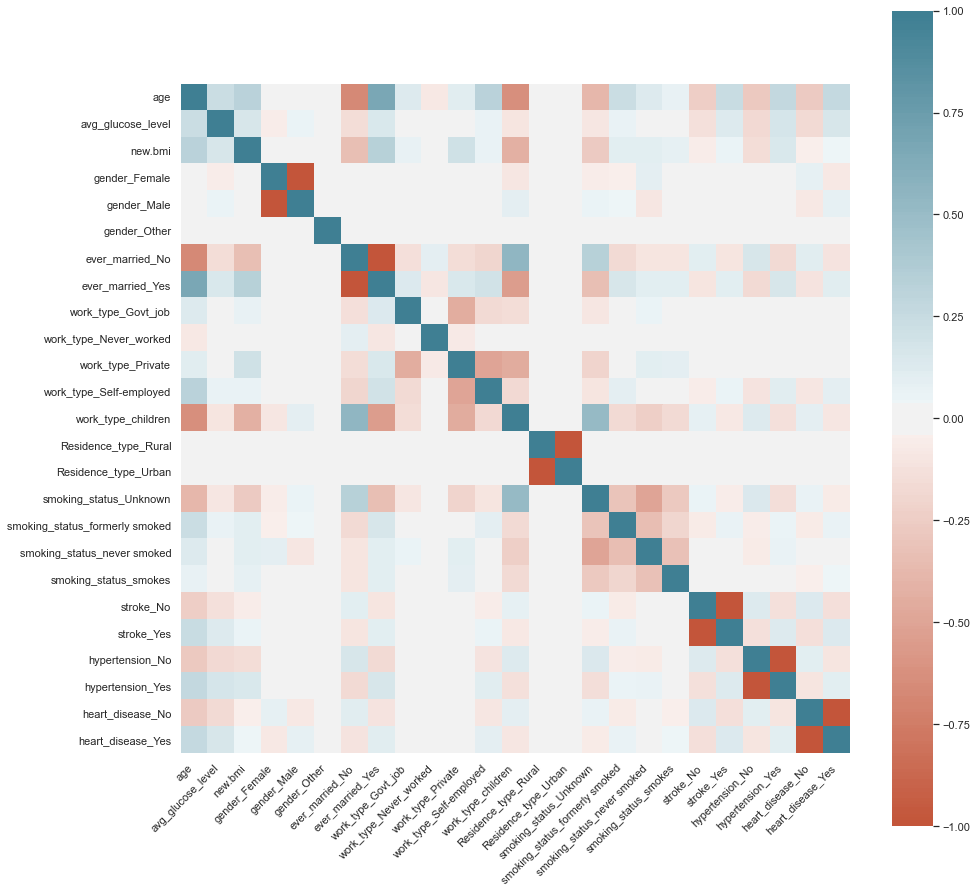

In [235]:
correlation_anlysis(df)  #stroke is highly correlated to age 

In [236]:
df.head()

,age,avg_glucose_level,new.bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_No,stroke_Yes,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes
0,67.0,228.69,36.60,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
1,61.0,202.21,34.55,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
2,80.0,105.92,32.50,0,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
3,49.0,171.23,34.40,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
4,79.0,174.12,24.00,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0


In [238]:
#Data Preparation
y = df['stroke_Yes']
X = df.drop(['stroke_Yes'], axis = 1)

In [239]:
#Importing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [240]:
!pip install imbalanced-learn

In [241]:
from imblearn.over_sampling import SMOTE

In [242]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

1    4861
0    4861
Name: stroke_Yes, dtype: int64

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 101, stratify = y_sm)

In [244]:
#Data Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)

In [246]:
#parameter tuning

model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30,50],
            'criterion':['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['lbfgs','liblinear']
        }
    },
   'KNN': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [1,3,5,7],
            'algorithm':['auto','kd_tree']
        }
    }
}

applying cross validation (Grid Search CV) for 4 models(SVM,Random Forest, Logistic Regression & K Nearest Neighbours)

In [159]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, verbose=3, n_jobs=-1, scoring = 'recall', return_train_score=False)
    clf.fit(X_scaled, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


,model,best_score,best_params
0,svm,NaN,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,NaN,"{'criterion': 'gini', 'n_estimators': 1}"
2,logistic_regression,NaN,"{'C': 1, 'solver': 'lbfgs'}"
3,KNN,NaN,"{'algorithm': 'auto', 'n_neighbors': 1}"


The above table shows the tuned parameters for each of the models that I want to apply. Based on these parameters I will implement each of the models and explore their accuracy and recall

In [162]:
#SVM

model_svm = SVC(gamma='auto',C=1, kernel='rbf', probability=True )
model_svm.fit(X_train,y_train)
svm_predictions = model_svm.predict(X_test)


In [163]:
#Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,svm_predictions))

,0,1
0,967,5
1,49,924


In [164]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

          No       0.95      0.99      0.97       972
         Yes       0.99      0.95      0.97       973

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



SVM has high accuracy rate of 97%. Specifically, the model is able to predict the stroke in people with 95% accuracy

Random Forest Classifier

In [165]:
rfc = RandomForestClassifier(n_estimators=1, criterion='gini' )
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [166]:
#Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,903,69
1,48,925


In [167]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

          No       0.95      0.93      0.94       972
         Yes       0.93      0.95      0.94       973

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



RandomForest has high accuracy rate of 94%. Specifically, the model is able to predict the stroke in people with 95% accuracy

Logistic Regression 

In [168]:
logmodel = LogisticRegression(solver='lbfgs',multi_class='auto', C = 1)
logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)

In [169]:
# Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,log_predictions))

,0,1
0,972,0
1,49,924


In [170]:
#Printing Classification Report
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

          No       0.95      1.00      0.98       972
         Yes       1.00      0.95      0.97       973

    accuracy                           0.97      1945
   macro avg       0.98      0.97      0.97      1945
weighted avg       0.98      0.97      0.97      1945



Logistic regression has high accuracy rate of 97%. Specifically, the model is able to predict the stroke in people with 95% accuracy

KNN


In [171]:
knn = KNeighborsClassifier(n_neighbors=1,algorithm = 'auto')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [172]:
# Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,knn_pred))

,0,1
0,915,57
1,34,939


In [173]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

          No       0.96      0.94      0.95       972
         Yes       0.94      0.97      0.95       973

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



KNN has accuracy rate of 95%. Specifically, the model is able to predict the stroke in people with 96% accuracy

ROC Curve and Area Under the Curve

In [174]:
from sklearn.metrics import roc_curve, auc

In [247]:
# ROC Logistic

y_pred_logistic = logmodel.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

ValueError: X has 24 features per sample; expecting 23

In [248]:
# ROC RAndomforest

y_pred_rfc = rfc.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

ValueError: X has 24 features, but DecisionTreeClassifier is expecting 23 features as input.

In [ ]:
#ROC SVM

y_pred_svm = model_svm.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

In [177]:
# ROC KNN

y_pred_knn = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

NameError: name 'rfc_fpr' is not defined

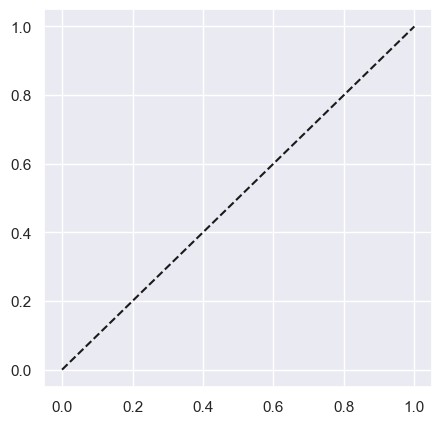

In [178]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_rfc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, marker='+', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

Without addressing class imbalance 

In [104]:
list(X_train)

[array([ 1.68145831, -0.31296967,  1.04059638,  0.84543782, -0.8450125 ,
        -0.01564219, -0.72836318,  0.72836318, -0.38678974, -0.06650266,
         0.87383597, -0.43560938, -0.40170093,  1.0103273 , -1.0103273 ,
         1.50765328, -0.45219298, -0.76011131, -0.43401854,  0.32566947,
        -0.32566947,  0.23676542, -0.23676542]),
 array([ 0.09191257, -0.17679581, -0.56411977,  0.84543782, -0.8450125 ,
        -0.01564219, -0.72836318,  0.72836318, -0.38678974, -0.06650266,
         0.87383597, -0.43560938, -0.40170093, -0.98977827,  0.98977827,
         1.50765328, -0.45219298, -0.76011131, -0.43401854,  0.32566947,
        -0.32566947,  0.23676542, -0.23676542]),
 array([ 0.5776071 ,  0.44342833, -0.55117851, -1.1828191 ,  1.18341445,
        -0.01564219, -0.72836318,  0.72836318, -0.38678974, -0.06650266,
        -1.14437953,  2.29563469, -0.40170093,  1.0103273 , -1.0103273 ,
        -0.66328248, -0.45219298,  1.31559679, -0.43401854,  0.32566947,
        -0.32566947,  0.23

In [105]:
error = []
# Calculating error for K values between 1 and 35
for i in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

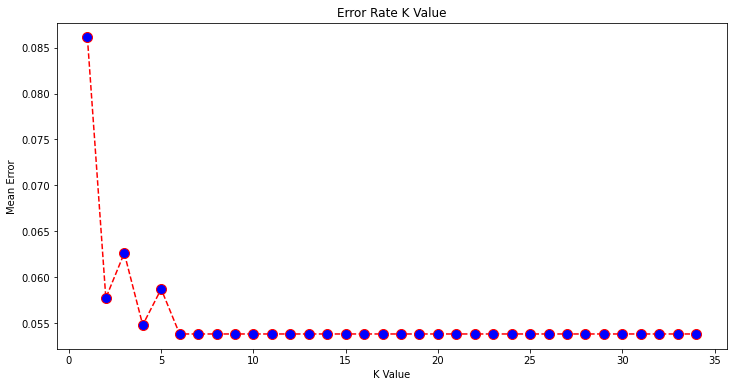

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 35), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#minimum error at k value of 6

In [110]:
# Age vs BMI with hue = stroke
import seaborn as sns



In [111]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=df[df['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=df[df['stroke'] == 1], ax=ax)
plt.show()

KeyError: 'stroke'

<Figure size 864x576 with 0 Axes>

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[967   0]
 [ 55   0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       967
         Yes       0.00      0.00      0.00        55

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
